<a href="https://colab.research.google.com/github/fay421/ML_Projects/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly Detection-Mall Customers


## About Anomaly Detection Algorithms:

Anomaly detection algorithms in unsupervised machine learning are designed to identify unusual or rare patterns (anomalies) within a dataset without the need for labeled training examples. Here's a brief overview of common unsupervised anomaly detection algorithms:


1.   Density-Based Approaches:

*   DBSCAN (Density-Based Spatial Clustering of Applications with Noise): DBSCAN clusters data points based on their density. Anomalies are data points that do not belong to any cluster or form small, sparse clusters.

2.   Distance-Based Approaches:

*  LOF (Local Outlier Factor): LOF calculates the local density around each data point and compares it to the density of its neighbors. Low LOF values indicate anomalies.

*   Isolation Forest: This algorithm builds an ensemble of decision trees and measures how quickly data points are isolated. Anomalies are isolated quickly and have shorter paths in the trees.

*   Elliptic Envelopes, specifically the Elliptic Envelope algorithm, is another approach to anomaly detection in unsupervised machine learning. This algorithm is based on the idea of fitting an ellipse around the majority of the data points, considering the data as normally distributed within this ellipse. Any data point that falls outside the ellipse is considered an anomaly.

3.   Statistical Approaches:
*   Z-Score or Standard Score: This method calculates the Z-Score for each feature in the dataset and identifies data points with extreme Z-Scores as anomalies.

*   One-Class SVM (Support Vector Machine): It trains a model on the majority class (normal data) and identifies anomalies as data points that deviate significantly from the learned model.

https://scikit-learn.org/stable/modules/outlier_detection.html


## Get Dataset
Dataset is available in Kaggle: https://www.kaggle.com/akram24/mall-customers

In [283]:
!gdown --id 1J25KWxM0cI7CxsHrGVB9DL-4q1GEfhww

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1J25KWxM0cI7CxsHrGVB9DL-4q1GEfhww
To: /content/Mall_Customers.csv
100% 4.29k/4.29k [00:00<00:00, 10.9MB/s]


## Import Libraries

In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm #cmap coloring
import seaborn as sns

## Craete DataFrame

In [285]:
df = pd.read_csv('Mall_Customers.csv')

## EDA

In [286]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [287]:
df.shape

(200, 5)

In [288]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [289]:
X = df.drop(['CustomerID','Genre','Age'],axis = 1)

In [290]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Annual Income (k$)      200 non-null    int64
 1   Spending Score (1-100)  200 non-null    int64
dtypes: int64(2)
memory usage: 3.2 KB


In [291]:
X.head(4)

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77


## Scale Data

In [292]:
from sklearn.preprocessing import MinMaxScaler

In [293]:
mms = MinMaxScaler()

In [294]:
X = mms.fit_transform(X)

## DBSCAN Model

In [296]:
from sklearn.cluster import DBSCAN

In [297]:
db = DBSCAN(eps=0.1,min_samples=5,metric='euclidean',n_jobs=-1)

In [298]:
clusters = db.fit_predict(X)

In [299]:
clusters

array([ 0,  0,  1,  0,  0,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,
        1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,
        2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,
        0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2,  0,  2, -1,  2,  0,
       -1,  0,  2,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [300]:
for i in range(len(clusters)):
  if clusters[i] != -1:
    clusters[i] = 0

In [301]:
clusters

array([ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
       -1,  0,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1])

## Scatter Plot

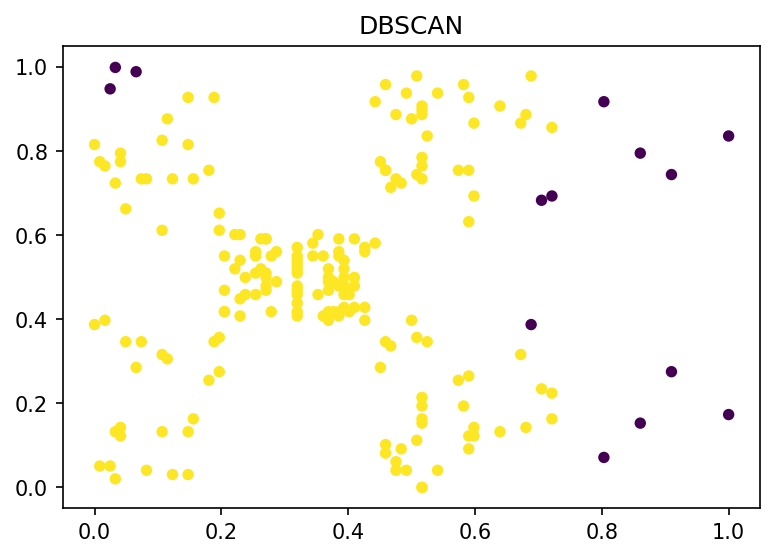

In [303]:
plt.figure(figsize=(6,4),dpi=150)
plt.scatter(X[:,0],X[:,1],c =clusters,s = 20,)
plt.title('DBSCAN')
plt.show()

## IForest Model

In [304]:
from sklearn.ensemble import IsolationForest

In [305]:
if_an= IsolationForest(n_estimators=20, max_features=1,max_samples=50,contamination=0.1,warm_start=True)

In [306]:
if_an_list = if_an.fit_predict(X)

In [307]:
if_an_list

array([ 1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1])

In [308]:
if_an_list =pd.Series(if_an_list).replace([-1,1],[1,0])
X_if_an=X[if_an_list==1]

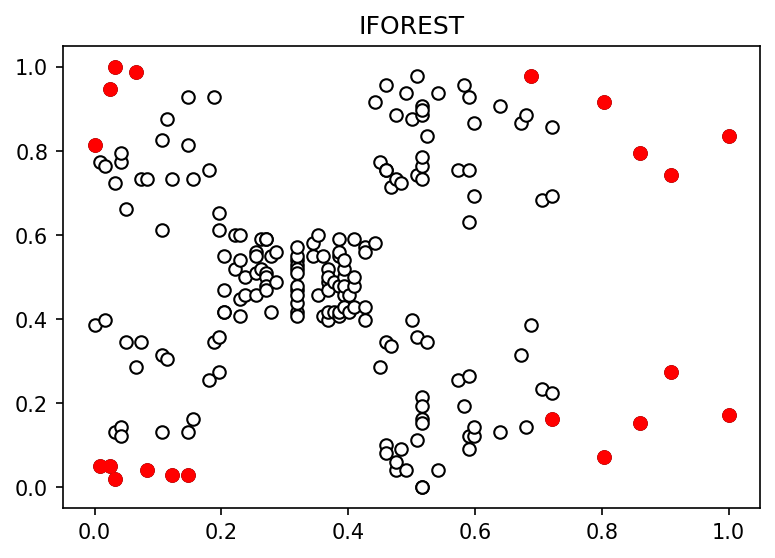

In [312]:
plt.figure(figsize=(6,4),dpi=150)
plt.scatter(X[:,0],X[:,1],c ='w',edgecolors='k')
plt.scatter(X_if_an[:,0],X_if_an[:,1],c ='r')
plt.title('IFOREST')
plt.show()

## Local Outlier Factor Model

In [314]:
from sklearn.neighbors import LocalOutlierFactor

In [315]:
lof_an = LocalOutlierFactor(n_neighbors=2, contamination=0.1)

In [317]:
lof_an_label = lof_an.fit_predict(X)

In [319]:
X_lof_an=X[lof_an_label==-1]

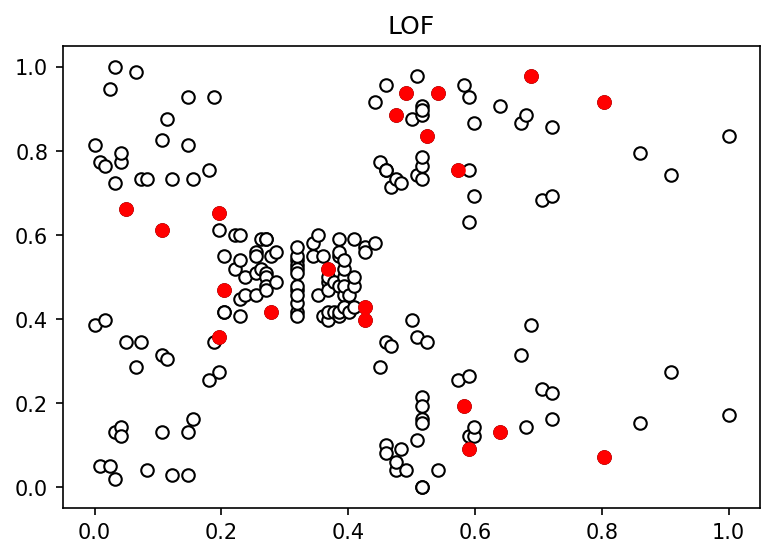

In [320]:
plt.figure(figsize=(6,4),dpi=150)
plt.scatter(X[:,0],X[:,1],c ='w',edgecolors='k')
plt.scatter(X_lof_an[:,0],X_lof_an[:,1],c ='r')
plt.title('LOF')
plt.show()

## One Class Support Vector Machine/ OCSVM Model

In [321]:
from sklearn.svm import OneClassSVM

In [324]:
ocsvm_an = OneClassSVM(nu=0.05,kernel='rbf',gamma='auto')

In [325]:
ocsvm_an_label = ocsvm_an.fit_predict(X)

In [326]:
ocsvm_an_label

array([ 1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1, -1])

In [327]:
X_ocsvm_an=X[ocsvm_an_label==-1]

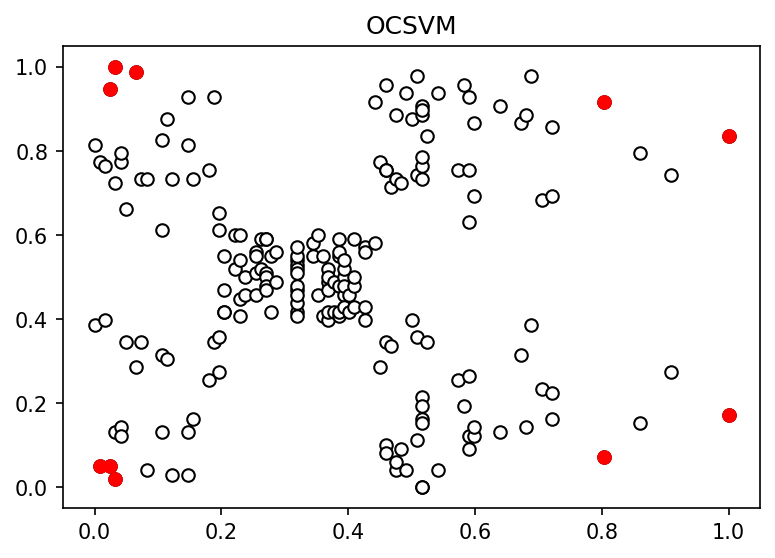

In [328]:
plt.figure(figsize=(6,4),dpi=150)
plt.scatter(X[:,0],X[:,1],c ='w',edgecolors='k')
plt.scatter(X_ocsvm_an[:,0],X_ocsvm_an[:,1],c ='r')
plt.title('OCSVM')
plt.show()

## Elleptic Envelop

In [329]:
from sklearn.covariance import EllipticEnvelope

In [333]:
ee_an = EllipticEnvelope(contamination=0.05)

In [334]:
ee_an_label = ee_an.fit_predict(X)

In [335]:
ee_an_label

array([ 1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1, -1,  1, -1,  1, -1, -1])

In [337]:
X_ee_an =X[ee_an_label==-1]

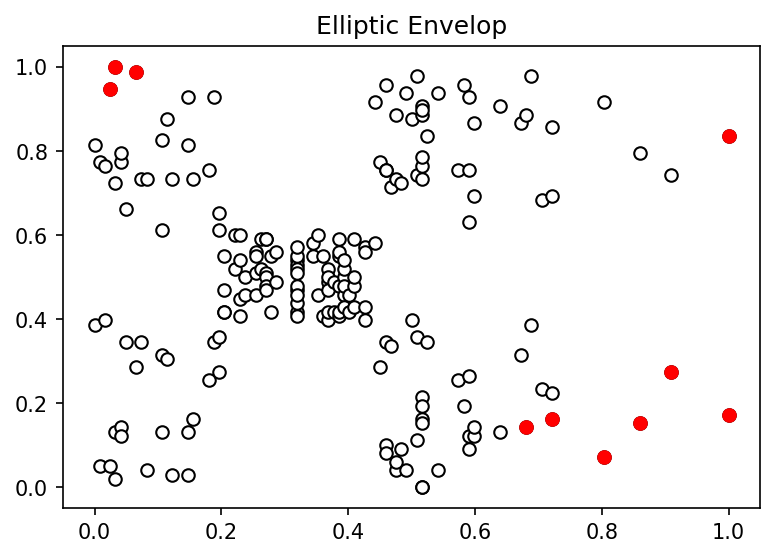

In [338]:
plt.figure(figsize=(6,4),dpi=150)
plt.scatter(X[:,0],X[:,1],c ='w',edgecolors='k')
plt.scatter(X_ee_an[:,0],X_ee_an[:,1],c ='r')
plt.title('Elliptic Envelop')
plt.show()